# Single compartmental model - passive soma

We define and then numerically simulate a single compartment, made of a passive membrane equipped by only *leak* (i.e., non voltage-dependent) ion channels. A current-clamp microelectrode, stimulating intracellularly by a step-wise DC waveform of amplitude $I_{stim}(t)$ is also *inserted* inside the membrane and used to stimulate the compartment.

The membrane potential $V$ evolves in time according to the usual ordinary differential equation:

$C \frac{dV(t)}{dt}\ = \ G_{leak} (E_{leak} - V) + I_{stim}$

The initial condition is also provided

$V(0) = -70 mV$

In [1]:
#@title NEURON install (launch only once)
# Note: Google Colab gives you access to an "instance".
# This is a virtual machine ("container" would be more correct) that runs
# Linux with already a Python installation.
!pip install neuron

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 46.5 MB/s eta 0:00:00


In [44]:
#@title NEURON and other Python Libraries import
from neuron import n
import matplotlib.pyplot as plt

# run standard library for high-level simulation control functions
n.load_file("stdrun.hoc")

# Only in a jupyter notebook / jupyter lab environment
%matplotlib inline

In [45]:
#@title Define and create the model
# create model
soma  = n.Section(name="soma")
soma.L  = 10            # length µm
soma.diam = 10          # diameter µm
soma.insert('pas')      # add passive properties
soma.g_pas = 1/10000    # set the specific membrane
                        # resistance to 10000 ohm*cm^2
# current clamp
stim = n.IClamp(soma(0.5))
stim.delay = 20         # start of the current injection (ms)
stim.dur  = 100         # duration (ms)
stim.amp  = 0.01        # amplitude (nA)

# record voltage at the soma, the injected current, and the time
soma_v = n.Vector()
soma_v.record(soma(0.5)._ref_v)

stim_current = n.Vector()
stim_current.record(stim._ref_i)

t = n.Vector()
t.record(n._ref_t)

Vector[11]

(-80.0, 0.0)

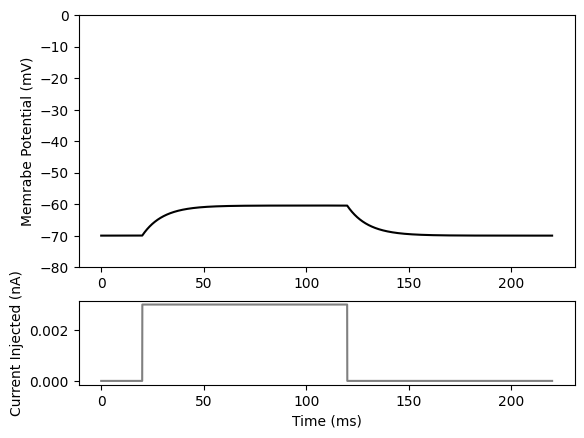

In [48]:
#@title Run the numerical simulation { run: "auto" }

n.t = 0
n.tstop = 220 # set the simulation time
n.dt = 0.025
n.v_init = -70
stim.amp = 0.003 #@param {type:"slider", min:-0.005, max:0.02, step:0.001}

n.run()



# plotting
f, (ax0, ax1) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]})
ax0.plot(t,soma_v, 'k')
ax1.plot(t,stim_current, 'gray', label='I (nA)')

ax0.set_ylabel('Memrabe Potential (mV)')
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Current Injected (nA)')
ax0.set_ylim([-80, 0])